In [358]:

import pandas as pd
import numpy as np
import seaborn as sns

In [359]:
feature_names = ["First Term Gpa", "Second Term Gpa", "First Language", "Funding numeric", "School numeric", 
                 "FastTrack numeric","Coop numeric","Residency numeric","Gender numeric","Previous Education",
                 "Age Group","High School Average Mark","Math Score","English Grade","FirstYearPersistence"]

In [360]:

import os

file_name = os.path.join(".", "Student data.csv")

students_dataset = pd.read_csv(file_name, names=feature_names, na_values = ["?"], skiprows=24)
     

In [361]:
students_dataset

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,NaN,4,6,2,2,2,2,1.0,1.0,NaN,47.0,10.0,0
1433,4.360000,4.074074,1.0,2,6,1,1,1,1,2.0,4.0,NaN,NaN,10.0,1
1434,2.020833,2.450000,1.0,2,6,2,1,1,2,1.0,1.0,78.0,18.0,9.0,1
1435,4.021739,4.357143,NaN,4,6,2,1,2,1,1.0,2.0,NaN,46.0,8.0,1


In [127]:
#students_dataset.fillna((students_dataset.mean()), inplace=True)

In [413]:
X = students_dataset.copy()

In [414]:
y = X.pop('FirstYearPersistence')
y = y[:, np.newaxis]

C:\Users\phili\AppData\Local\Temp\ipykernel_7748\795413588.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [415]:
X.head(5)

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0


In [416]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [417]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



features_pipeline = Pipeline([
    
    ('imputer', SimpleImputer(strategy="mean", missing_values=np.nan)),
    
    ('std_scaler', StandardScaler()),
])

In [418]:
features_pipeline.fit_transform(X)

array([[-2.43730190e+00, -2.65171565e+00, -9.53603358e-01, ...,
        -2.16519662e+00, -1.87796704e+00, -6.10125930e-01],
       [-2.96367874e-01, -7.71183337e-01,  1.13990335e+00, ...,
         0.00000000e+00,  8.05882336e-16, -6.10125930e-01],
       [ 1.20228595e+00,  1.03702088e+00, -9.53603358e-01, ...,
         1.77093078e+00,  9.57479356e-01,  5.74386336e-01],
       ...,
       [-7.06713848e-01, -3.48063568e-01, -9.53603358e-01, ...,
         1.01058550e-01, -1.65113133e+00,  5.74386336e-01],
       [ 1.00680925e+00,  1.44515845e+00, -2.32425935e-16, ...,
         0.00000000e+00,  1.52456864e+00, -1.78697971e-02],
       [-6.10371817e-01,  3.62666694e-01, -9.53603358e-01, ...,
         4.58888313e-01, -6.30370627e-01,  5.74386336e-01]])

In [419]:
X_transormed = pd.DataFrame(features_pipeline.transform(X))
X_transormed.columns = students_dataset.columns[:-1]
X_transormed.index = students_dataset.index

In [420]:
X_transormed

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
0,-2.437302,-2.651716,-9.536034e-01,-0.737286,0.0,0.589941,-1.510239,-0.827431,0.537404,-0.485079,-1.149790,-2.165197,-1.877967e+00,-0.610126
1,-0.296368,-0.771183,1.139903e+00,0.853525,0.0,-1.695086,0.662147,1.208560,0.537404,-0.485079,0.259662,0.000000,8.058823e-16,-0.610126
2,1.202286,1.037021,-9.536034e-01,-1.532691,0.0,0.589941,-1.510239,-0.827431,-1.846083,1.279180,0.259662,1.770931,9.574794e-01,0.574386
3,0.149660,-0.468955,1.139903e+00,0.853525,0.0,-1.695086,0.662147,1.208560,0.537404,1.279180,0.259662,0.000000,8.058823e-16,-0.017870
4,1.223695,1.416744,-9.536034e-01,-0.737286,0.0,-1.695086,-1.510239,-0.827431,-1.846083,1.279180,0.259662,2.367314,8.058823e-16,0.574386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,-1.227209,-2.651716,-2.324259e-16,0.853525,0.0,0.589941,0.662147,1.208560,0.537404,-0.485079,-1.149790,0.000000,1.637986e+00,1.166642
1433,1.296487,1.178998,-9.536034e-01,-0.737286,0.0,-1.695086,-1.510239,-0.827431,-1.846083,1.279180,0.964387,0.000000,8.058823e-16,1.166642
1434,-0.706714,-0.348064,-9.536034e-01,-0.737286,0.0,0.589941,-1.510239,-0.827431,0.537404,-0.485079,-1.149790,0.101059,-1.651131e+00,0.574386
1435,1.006809,1.445158,-2.324259e-16,0.853525,0.0,0.589941,-1.510239,1.208560,-1.846083,-0.485079,-0.445064,0.000000,1.524569e+00,-0.017870


In [421]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_transormed, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train_val, y_train_val, test_size=0.35, random_state=42)

In [356]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_transormed, y, test_size=0.17, random_state=42)
# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [422]:
import tensorflow as tf

In [423]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [424]:

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
     

In [425]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
     

In [426]:
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 0.6966 - accuracy: 0.4931 - val_loss: 0.6828 - val_accuracy: 0.6278
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5605 - val_loss: 0.6712 - val_accuracy: 0.6790
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.6080 - val_loss: 0.6595 - val_accuracy: 0.7017
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6371 - val_loss: 0.6489 - val_accuracy: 0.7216
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6493 - val_loss: 0.6383 - val_accuracy: 0.7301
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.6616 - val_loss: 0.6278 - val_accuracy: 0.7358
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.7228 - val_loss: 0.6172 - val_accuracy: 0.7415
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8254 - val_loss: 0.3807 - val_accuracy: 0.8438
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4016 - accuracy: 0.8453 - val_loss: 0.3798 - val_accuracy: 0.8438
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3917 - accuracy: 0.8438 - val_loss: 0.3795 - val_accuracy: 0.8438
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8484 - val_loss: 0.3793 - val_accuracy: 0.8438
Epoch 63/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8361 - val_loss: 0.3792 - val_accuracy: 0.8438
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8407 - val_loss: 0.3787 - val_accuracy: 0.8438
Epoch 65/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3950 - accuracy: 0.8270 - val_loss: 0.3784 - val_accuracy: 0.8438
Epoch 

In [427]:
score = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8565


(0.0, 1.0)

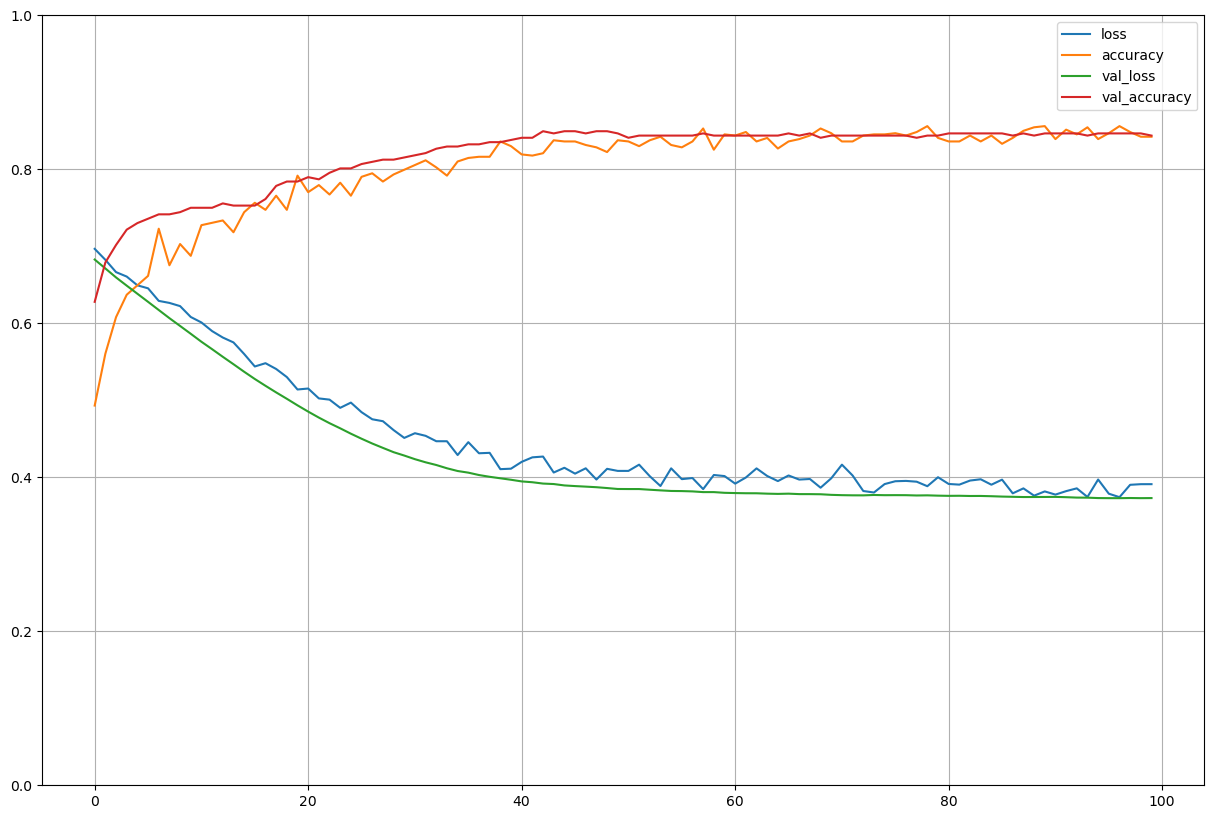

In [428]:
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [36]:
import keras_tuner
from tensorflow import keras

In [378]:
def build_model3(hp):
  num_layers = hp.Int("num_layers", 1, 10)
  #dropout = hp.Boolean("dropout")
  dropout_rate = hp.Float("dr", min_value=0.0, max_value=0.5)  
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  model = keras.Sequential()

    
  for i in range(num_layers):
    model.add(
        keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=5, max_value=200, step=10),
            activation=hp.Choice(f"activation_{i}", ["relu", "tanh"]),
        )
    )
    model.add(keras.layers.Dropout(rate=dropout_rate))

  #if dropout:
  #  model.add(keras.layers.Dropout(rate=dropout_rate))

  model.add(keras.layers.Dense(1, activation="sigmoid"))

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
  )

  return model
     

In [379]:
tuner3 = keras_tuner.RandomSearch(
    hypermodel=build_model3,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_result",
    project_name="group_project",
)
     

In [380]:
tuner3.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Trial 100 Complete [00h 00m 08s]
val_accuracy: 0.8636363744735718

Best val_accuracy So Far: 0.8721590936183929
Total elapsed time: 00h 17m 06s
INFO:tensorflow:Oracle triggered exit


In [325]:
tuner3.search_space_summary()

Search space summary
Default search space size: 23
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
dr (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_2 (Choice)
{'default': 'relu', 'c

In [429]:
best_hps3 = tuner3.get_best_hyperparameters()
model3 = build_model3(best_hps3[0])

In [430]:

history3 = model3.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 2s 17ms/step - loss: 0.4899 - accuracy: 0.7856 - val_loss: 0.3924 - val_accuracy: 0.8125
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4577 - accuracy: 0.8239 - val_loss: 0.4019 - val_accuracy: 0.8324
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4654 - accuracy: 0.8193 - val_loss: 0.3554 - val_accuracy: 0.8693
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.7933 - val_loss: 0.3744 - val_accuracy: 0.8153
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8178 - val_loss: 0.3573 - val_accuracy: 0.8636
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.8545 - val_loss: 0.3444 - val_accuracy: 0.8665
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4026 - accuracy: 0.8438 - val_loss: 0.3655 - val_accuracy: 0.8494
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3211 - accuracy: 0.8714 - val_loss: 0.3454 - val_accuracy: 0.8722
Epoch 60/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3181 - accuracy: 0.8668 - val_loss: 0.3672 - val_accuracy: 0.8636
Epoch 61/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3016 - accuracy: 0.8744 - val_loss: 0.3599 - val_accuracy: 0.8636
Epoch 62/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.8744 - val_loss: 0.4033 - val_accuracy: 0.8608
Epoch 63/100
21/21 [==============================] - 0s 7ms/step - loss: 0.2971 - accuracy: 0.8714 - val_loss: 0.4111 - val_accuracy: 0.8523
Epoch 64/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3003 - accuracy: 0.8760 - val_loss: 0.4054 - val_accuracy: 0.8608
Epoch 65/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2933 - accuracy: 0.8806 - val_loss: 0.4007 - val_accuracy: 0.8722
Epoch 

In [431]:
score = model3.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8472


(0.0, 1.0)

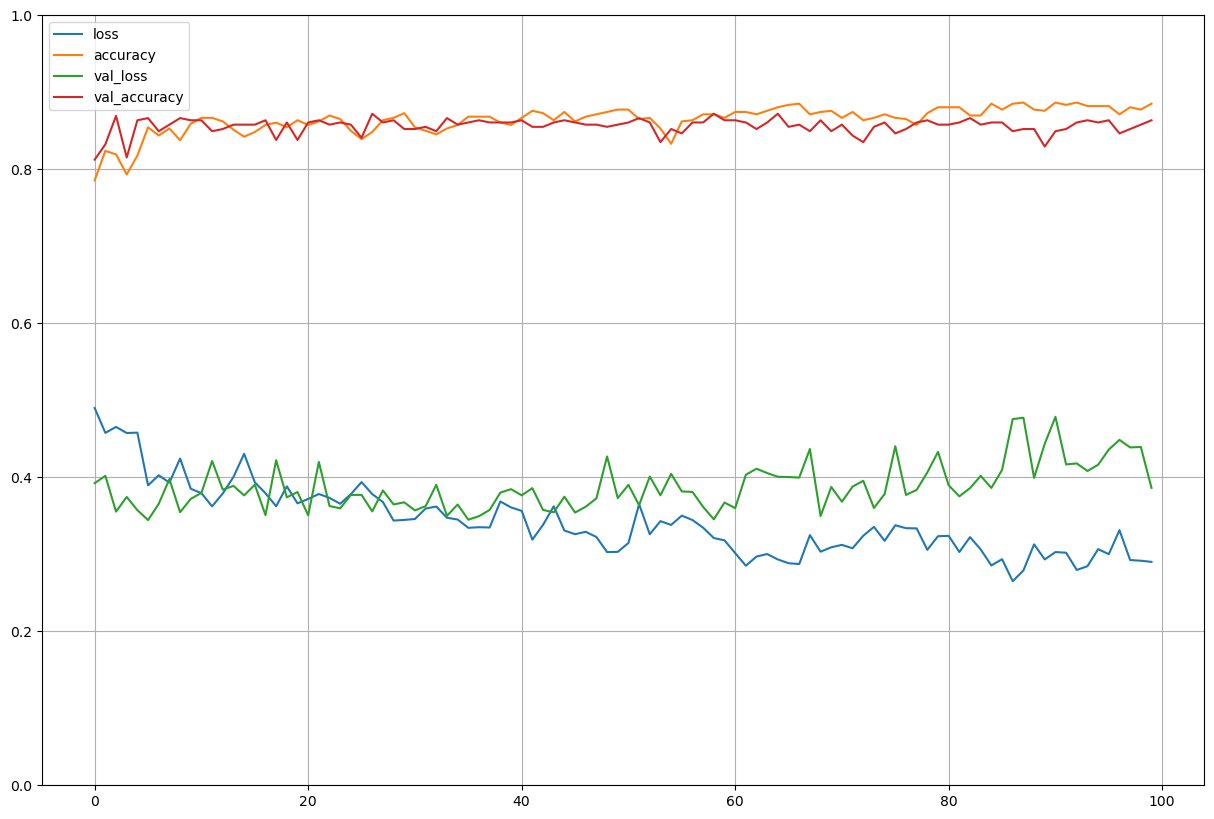

In [432]:
pd.DataFrame(history3.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [ ]:

# Fit with the entire dataset.
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))

history = model.fit(x=x_all, y=y_all, epochs=100)


In [301]:
def build_model4(hp):
  num_layers = hp.Int("num_layers", 1, 10)
  #dropout = hp.Boolean("dropout")
  dropout_rate = hp.Float("dr", min_value=0.1, max_value=0.5)  
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  model = keras.Sequential()

    
  for i in range(num_layers):
    model.add(
        keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=5, max_value=200, step=10),
            activation=hp.Choice(f"activation_{i}", ["relu", "tanh"]),
        )
    )
    model.add(keras.layers.Dropout(rate=dropout_rate))

  #if dropout:
  #  model.add(keras.layers.Dropout(rate=dropout_rate))

  model.add(keras.layers.Dense(1, activation="sigmoid"))

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
  )

  return model
     

In [302]:
tuner4 = keras_tuner.RandomSearch(
    hypermodel=build_model4,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_result",
    project_name="group_project",
)
     

In [303]:
tuner4.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Trial 100 Complete [00h 00m 15s]
val_accuracy: 0.859375

Best val_accuracy So Far: 0.8707386255264282
Total elapsed time: 00h 21m 37s
INFO:tensorflow:Oracle triggered exit


In [305]:
tuner4.search_space_summary()

Search space summary
Default search space size: 23
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
dr (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_2 (Choice)
{'default': 'relu', 'c

In [433]:
best_hps4 = tuner4.get_best_hyperparameters()
model4 = build_model4(best_hps3[0])

In [434]:

history4 = model4.fit(
    X_train, y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 2s 25ms/step - loss: 0.4785 - accuracy: 0.7856 - val_loss: 0.4172 - val_accuracy: 0.8324
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 0.4523 - accuracy: 0.8025 - val_loss: 0.4080 - val_accuracy: 0.8381
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.8392 - val_loss: 0.4069 - val_accuracy: 0.8239
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 0.3930 - accuracy: 0.8499 - val_loss: 0.4037 - val_accuracy: 0.8267
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.3868 - accuracy: 0.8530 - val_loss: 0.4245 - val_accuracy: 0.8352
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.8162 - val_loss: 0.4185 - val_accuracy: 0.8523
Epoch 7/100
21/21 [==============================] - 0s 9ms/step - loss: 0.4127 - accuracy: 0.8208 - val_loss: 0.3828 - val_accuracy: 0.8438
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3562 - accuracy: 0.8683 - val_loss: 0.3992 - val_accuracy: 0.8494
Epoch 60/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3328 - accuracy: 0.8744 - val_loss: 0.4144 - val_accuracy: 0.8551
Epoch 61/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3380 - accuracy: 0.8790 - val_loss: 0.4203 - val_accuracy: 0.8523
Epoch 62/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3536 - accuracy: 0.8622 - val_loss: 0.4112 - val_accuracy: 0.8438
Epoch 63/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3605 - accuracy: 0.8469 - val_loss: 0.3868 - val_accuracy: 0.8551
Epoch 64/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3455 - accuracy: 0.8515 - val_loss: 0.4439 - val_accuracy: 0.8352
Epoch 65/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3821 - accuracy: 0.8515 - val_loss: 0.4077 - val_accuracy: 0.8438
Epoch 

In [435]:
score = model4.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8634


(0.0, 1.0)

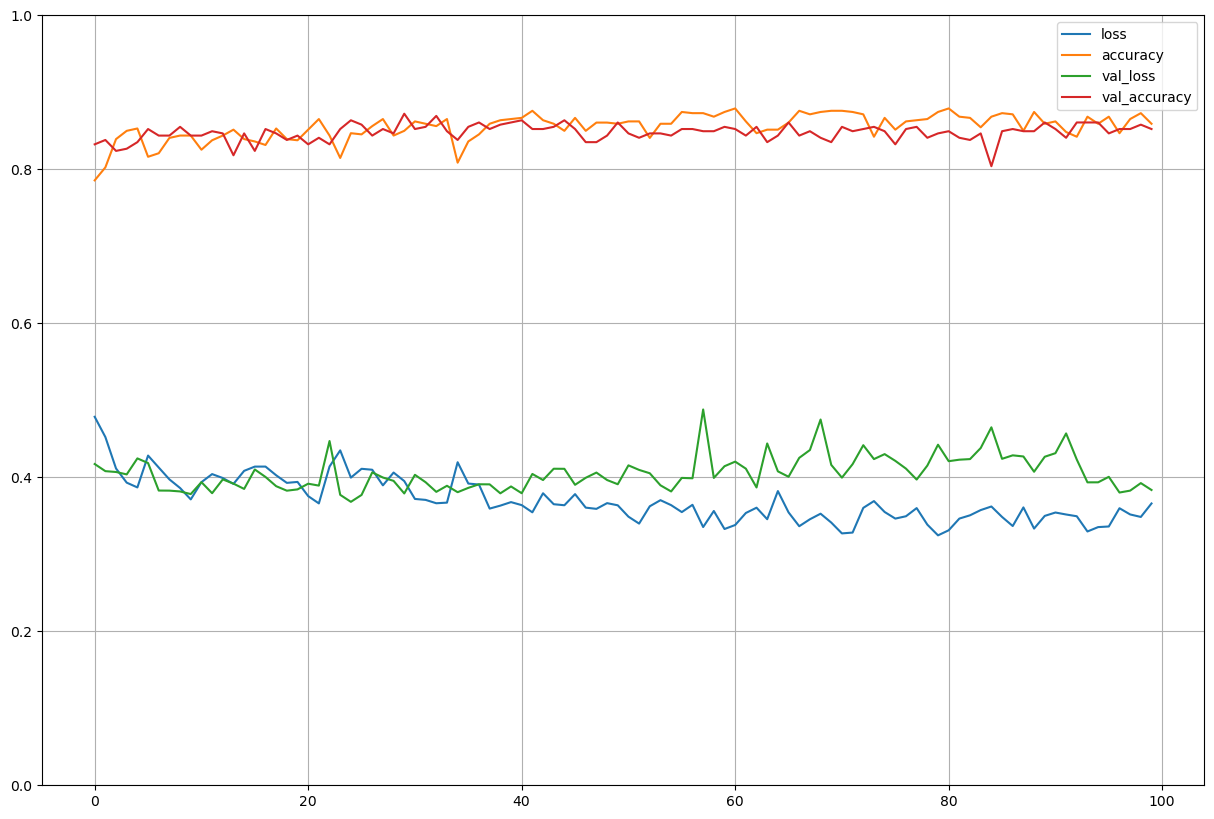

In [436]:
pd.DataFrame(history4.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [390]:
students_dataset["FirstYearPersistence"].value_counts()

1    1138
0     299
Name: FirstYearPersistence, dtype: int64

In [391]:
# Separate majority and minority classes
df_majority = students_dataset[students_dataset["FirstYearPersistence"]==1]     # 1   
df_minority = students_dataset[students_dataset["FirstYearPersistence"]==0]     # 0   

In [392]:
df_majority.shape

(1138, 15)

In [393]:
df_minority.shape

(299, 15)

In [394]:
from sklearn.utils import resample

# Upsample minority class 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled["FirstYearPersistence"].value_counts())
# =============================================================================
# 0    14563
# 1    14563
# =============================================================================


1    1138
0    1138
Name: FirstYearPersistence, dtype: int64


In [395]:
# from sklearn.utils import resample

# # Upsample minority class 
# df_majority_downsampled = resample(df_majority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=len(df_minority),    # to match majority class
#                                  random_state=42) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# print(df_downsampled["FirstYearPersistence"].value_counts())
# # =============================================================================
# # 0    299
# # 1    299
# # =============================================================================


# df_upsampled = df_downsampled


In [396]:

y_upsampled = df_upsampled["FirstYearPersistence"];
X_upsampled = df_upsampled.drop("FirstYearPersistence", axis=1, errors='ignore')

In [397]:
X_upsampled = df_upsampled.copy()

In [398]:
y_upsampled = X_upsampled.pop('FirstYearPersistence')
y_upsampled = y_upsampled[:, np.newaxis]

C:\Users\phili\AppData\Local\Temp\ipykernel_7748\2309369391.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_upsampled = y_upsampled[:, np.newaxis]


In [399]:
features_pipeline.fit_transform(X_upsampled)

array([[-1.79866208e+00, -2.34073562e+00, -8.31847533e-01, ...,
        -1.85190954e+00, -1.64313571e+00, -5.75860475e-01],
       [ 5.97206068e-02, -5.18946679e-01,  1.28414298e+00, ...,
         0.00000000e+00,  0.00000000e+00, -5.75860475e-01],
       [ 1.36058848e+00,  1.23277353e+00, -8.31847533e-01, ...,
         1.80263126e+00,  1.11997727e+00,  6.12942399e-01],
       ...,
       [ 1.17475022e+00,  1.37874983e+00, -8.31847533e-01, ...,
         2.13486224e+00,  0.00000000e+00,  6.12942399e-01],
       [-1.05530900e+00, -9.39359091e-01, -8.31847533e-01, ...,
        -1.18744758e+00, -1.31156215e+00, -5.75860475e-01],
       [-1.79866208e+00, -4.04518405e-16, -8.31847533e-01, ...,
         0.00000000e+00,  8.98928229e-01, -2.35906479e+00]])

In [400]:
X_upsampled_transormed = pd.DataFrame(features_pipeline.transform(X_upsampled))
X_upsampled_transormed.columns = df_upsampled.columns[:-1]
X_upsampled_transormed.index = df_upsampled.index

In [401]:
X_upsampled_transormed

,First Term Gpa,Second Term Gpa,First Language,Funding numeric,School numeric,FastTrack numeric,Coop numeric,Residency numeric,Gender numeric,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
0,-1.798662,-2.340736e+00,-0.831848,-0.637034,0.0,0.505349,-1.442164,-0.706641,0.506771,-0.385775,-1.066450,-1.851910,-1.643136,-0.575860
1,0.059721,-5.189467e-01,1.284143,1.023779,0.0,-1.978830,0.693402,1.415146,0.506771,-0.385775,0.320852,0.000000,0.000000,-0.575860
2,1.360588,1.232774e+00,-0.831848,-1.467441,0.0,0.505349,-1.442164,-0.706641,-1.942083,1.321259,0.320852,1.802631,1.119977,0.612942
3,0.446883,-2.261588e-01,1.284143,1.023779,0.0,-1.978830,0.693402,1.415146,0.506771,1.321259,0.320852,0.000000,0.000000,0.018541
4,1.379172,1.600635e+00,-0.831848,-0.637034,0.0,-1.978830,-1.442164,-0.706641,-1.942083,1.321259,0.320852,2.356350,0.000000,0.612942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,-1.441853,-4.045184e-16,-0.831848,-0.637034,0.0,0.505349,0.693402,-0.706641,0.506771,-0.385775,-1.066450,-0.633729,-0.758940,0.612942
1113,-1.798662,-4.045184e-16,-0.831848,-0.637034,0.0,0.505349,0.693402,-0.706641,0.506771,-0.385775,-0.372799,-0.965960,-0.537891,0.612942
433,1.174750,1.378750e+00,-0.831848,-0.637034,0.0,-1.978830,-1.442164,-0.706641,0.506771,1.321259,0.320852,2.134862,0.000000,0.612942
245,-1.055309,-9.393591e-01,-0.831848,-0.637034,0.0,0.505349,-1.442164,-0.706641,0.506771,-0.385775,3.095456,-1.187448,-1.311562,-0.575860


In [404]:
from sklearn.model_selection import train_test_split

X_upsampled_train_val, X_upsampled_test, y_upsampled_train_val, y_upsampled_test = train_test_split(X_upsampled_transormed, y_upsampled, test_size=0.3, random_state=42)
X_upsampled_train, X_upsampled_val, y_upsampled_train, y_upsampled_val  = train_test_split(X_upsampled_train_val, y_upsampled_train_val, test_size=0.35, random_state=42)

In [405]:
def build_model5(hp):
  num_layers = hp.Int("num_layers", 1, 10)
  dropout_rate = hp.Float("dr", min_value=0.0, max_value=0.5)  
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  model = keras.Sequential()

    
  for i in range(num_layers):
    model.add(
        keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=5, max_value=200, step=10),
            activation=hp.Choice(f"activation_{i}", ["relu", "tanh"]),
        )
    )
    model.add(keras.layers.Dropout(rate=dropout_rate))


  model.add(keras.layers.Dense(1, activation="sigmoid"))

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
  )

  return model
     

In [406]:
tuner5 = keras_tuner.RandomSearch(
    hypermodel=build_model5,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_result",
    project_name="group_project",
)
     

In [407]:
tuner5.search(X_upsampled_train, y_upsampled_train, epochs=30, validation_data=(X_upsampled_val, y_upsampled_val))

Trial 100 Complete [00h 00m 18s]
val_accuracy: 0.804659515619278

Best val_accuracy So Far: 0.8655913770198822
Total elapsed time: 00h 22m 37s
INFO:tensorflow:Oracle triggered exit


In [408]:
tuner5.search_space_summary()

Search space summary
Default search space size: 23
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
dr (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 200, 'step': 10, 'sampling': None}
activation_2 (Choice)
{'default': 'relu', 'c

In [409]:
best_hps5 = tuner5.get_best_hyperparameters()
model5 = build_model5(best_hps5[0])

In [410]:

history5 = model5.fit(
    X_upsampled_train, y_upsampled_train, 
    batch_size=32, 
    validation_data=(X_upsampled_val, y_upsampled_val), 
    epochs=100
)

Epoch 1/100
33/33 [==============================] - 1s 12ms/step - loss: 0.5520 - accuracy: 0.7227 - val_loss: 0.4761 - val_accuracy: 0.7670
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4441 - accuracy: 0.7923 - val_loss: 0.4818 - val_accuracy: 0.7509
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.4088 - accuracy: 0.8242 - val_loss: 0.4436 - val_accuracy: 0.7957
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8280 - val_loss: 0.4475 - val_accuracy: 0.7867
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3643 - accuracy: 0.8406 - val_loss: 0.4077 - val_accuracy: 0.8297
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3222 - accuracy: 0.8676 - val_loss: 0.4430 - val_accuracy: 0.8226
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8792 - val_loss: 0.4247 - val_accuracy: 0.7903
Epoch 8/100


Epoch 59/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9836 - val_loss: 0.6977 - val_accuracy: 0.8602
Epoch 60/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.6250 - val_accuracy: 0.8781
Epoch 61/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9836 - val_loss: 0.6791 - val_accuracy: 0.8728
Epoch 62/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9865 - val_loss: 0.6558 - val_accuracy: 0.8746
Epoch 63/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.6842 - val_accuracy: 0.8746
Epoch 64/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0729 - accuracy: 0.9749 - val_loss: 0.5609 - val_accuracy: 0.8692
Epoch 65/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.5858 - val_accuracy: 0.8799
Epoch 

In [411]:
score = model5.evaluate(X_upsampled_test, y_upsampled_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.8653


(0.0, 1.0)

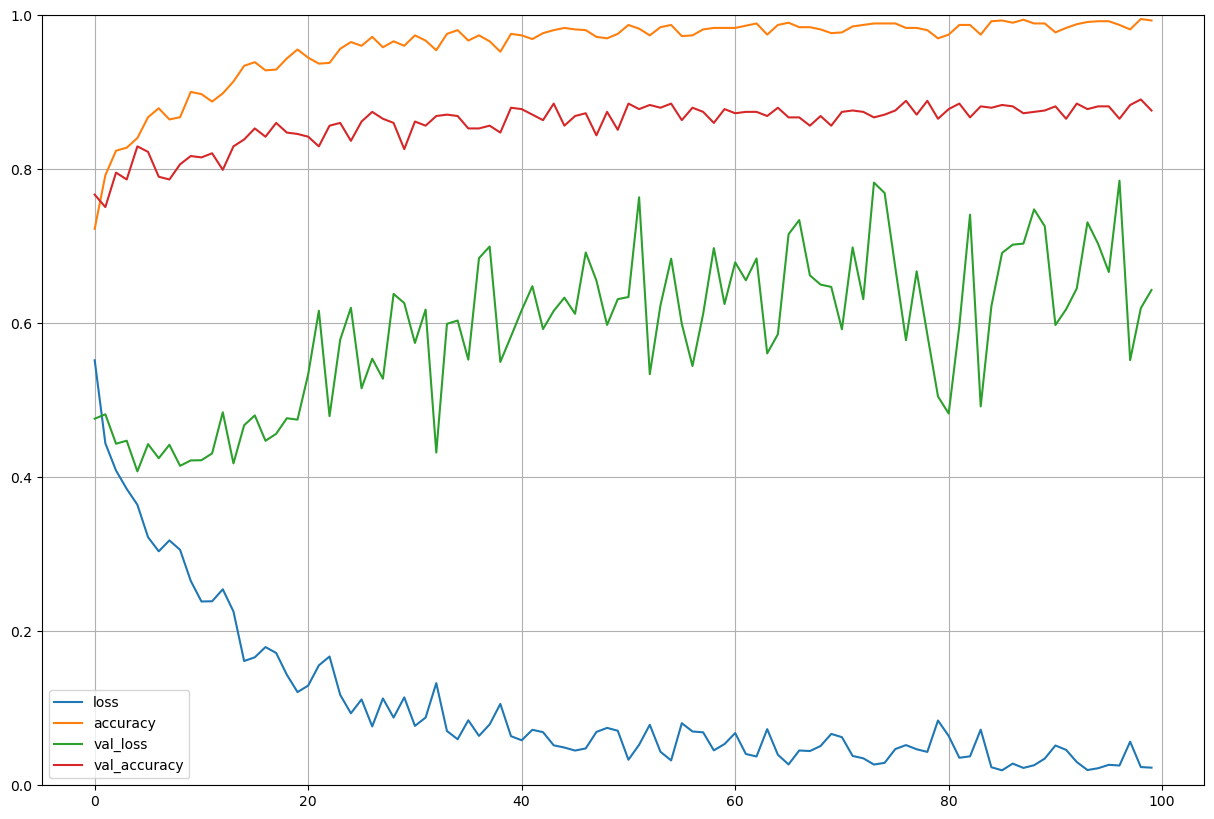

In [412]:
pd.DataFrame(history5.history).plot(figsize=(15, 10)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()